In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report


In [2]:
# Step 1: Load the Dataset
data_path = r"C:\\Users\\varun\\Downloads\\bank_data.csv"
data = pd.read_csv(data_path)
data.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
# Display basic information about the dataset
print("\nDataset Info:\n")
data.info()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45211 non-null  int64
 1   default          45211 non-null  int64
 2   balance          45211 non-null  int64
 3   housing          45211 non-null  int64
 4   loan             45211 non-null  int64
 5   duration         45211 non-null  int64
 6   campaign         45211 non-null  int64
 7   pdays            45211 non-null  int64
 8   previous         45211 non-null  int64
 9   poutfailure      45211 non-null  int64
 10  poutother        45211 non-null  int64
 11  poutsuccess      45211 non-null  int64
 12  poutunknown      45211 non-null  int64
 13  con_cellular     45211 non-null  int64
 14  con_telephone    45211 non-null  int64
 15  con_unknown      45211 non-null  int64
 16  divorced         45211 non-null  int64
 17  married          45211 non-null  i

In [4]:
# Step 2: Exploratory Data Analysis (EDA)
# Check for missing values
print("\nMissing Values:\n")
print(data.isnull().sum())


Missing Values:

age                0
default            0
balance            0
housing            0
loan               0
duration           0
campaign           0
pdays              0
previous           0
poutfailure        0
poutother          0
poutsuccess        0
poutunknown        0
con_cellular       0
con_telephone      0
con_unknown        0
divorced           0
married            0
single             0
joadmin.           0
joblue.collar      0
joentrepreneur     0
johousemaid        0
jomanagement       0
joretired          0
joself.employed    0
joservices         0
jostudent          0
jotechnician       0
jounemployed       0
jounknown          0
y                  0
dtype: int64


In [5]:
# Summary statistics
print("\nSummary Statistics:\n")
print(data.describe(include='all'))


Summary Statistics:

                age       default        balance       housing          loan  \
count  45211.000000  45211.000000   45211.000000  45211.000000  45211.000000   
mean      40.936210      0.018027    1362.272058      0.555838      0.160226   
std       10.618762      0.133049    3044.765829      0.496878      0.366820   
min       18.000000      0.000000   -8019.000000      0.000000      0.000000   
25%       33.000000      0.000000      72.000000      0.000000      0.000000   
50%       39.000000      0.000000     448.000000      1.000000      0.000000   
75%       48.000000      0.000000    1428.000000      1.000000      0.000000   
max       95.000000      1.000000  102127.000000      1.000000      1.000000   

           duration      campaign         pdays      previous   poutfailure  \
count  45211.000000  45211.000000  45211.000000  45211.000000  45211.000000   
mean     258.163080      2.763841     40.197828      0.580323      0.108403   
std      257.527812 

C:\Users\varun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


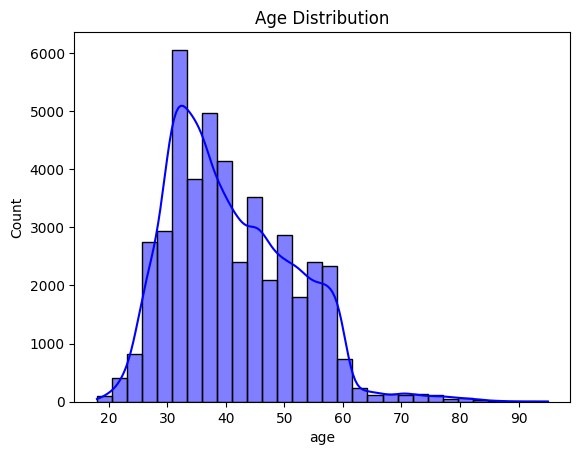

In [6]:
# Visualizations
sns.histplot(data['age'], kde=True, bins=30, color='blue')
plt.title("Age Distribution")
plt.show()

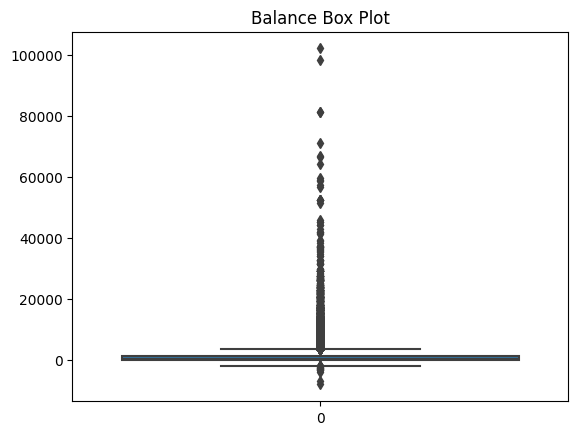

In [7]:
sns.boxplot(data['balance'])
plt.title("Balance Box Plot")
plt.show()


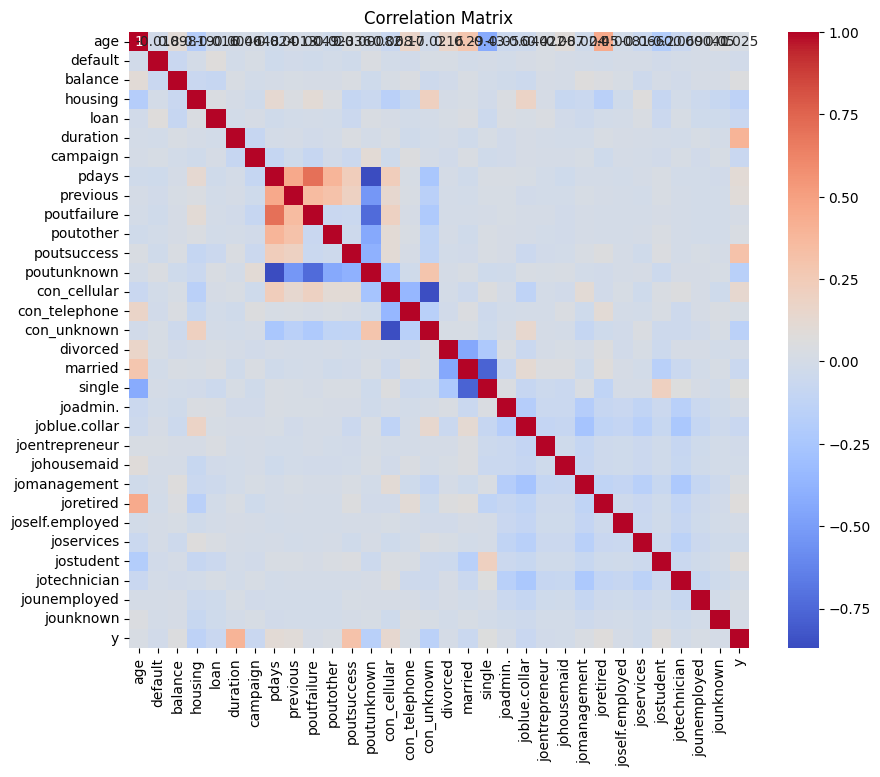

In [8]:
# Correlation matrix for numerical features
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [9]:
# Step 3: Data Preprocessing
# Separate features and target variable
target = 'y'  # Update to match the dataset's target column name
X = data.drop(columns=[target])
y = data[target]

In [10]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['number']).columns


In [11]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)


In [12]:

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)


In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)


In [14]:
# Step 4: Model Building
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
# Step 5: Model Evaluation
# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]


In [16]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [17]:
print("\nModel Performance Metrics:\n")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


Model Performance Metrics:

Accuracy: 0.90
Precision: 0.64
Recall: 0.32
F1-Score: 0.43
ROC-AUC: 0.89


In [18]:
# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.98      0.94     11966
           1       0.64      0.32      0.43      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.88      0.90      0.88     13564



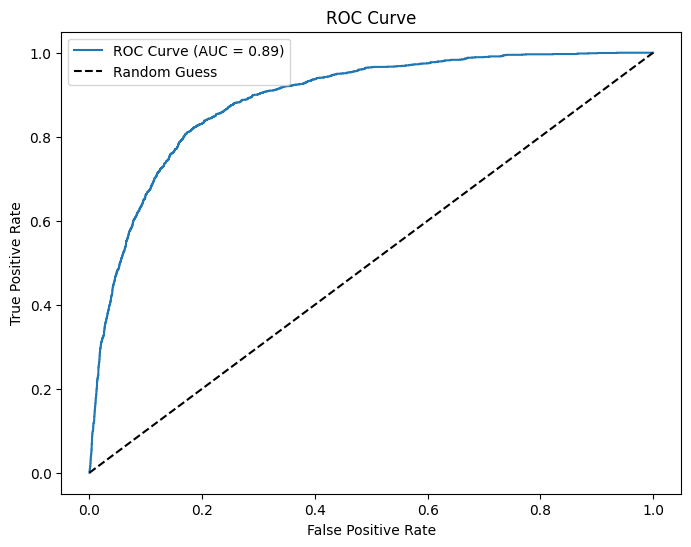

In [19]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()